In [1942]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [1943]:
df=pd.read_excel('F:\\Final_Train.xlsx')
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [1944]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


In [1945]:
df.shape

(5961, 6)

In [1946]:
a=df['Qualification'].str.split('-')
b=a.str[0].str.split(',').str[0]
df['Qualification']=b
df['Qualification']=df[df['Qualification'].str.isupper()]
df['Qualification'].value_counts()
df['Qualification']=df[df['Qualification'].str.len()<5]
df['Qualification']=df['Qualification'].fillna(method='ffill')

In [1947]:
a=['DNB','DDVL','LCEH','MDS','DNB','BSAM','DVD','DDV','DM','BEMS',
   'GCEH','MPH','BIMS','FNB','FAGE','MD','FRCP','CGO', 'MA',
   'MBA','DNHE','BUMS','DGO'] 
for i in a:
    df['Qualification']=df['Qualification'].str.replace(i,' ')
    #df['Qualification']=df['Qualification'].str.replace('NaN','MBBS')
df['Qualification'].value_counts()

MBBS    2511
BDS     1240
BAMS     743
BHMS     720
         546
MS       116
          85
Name: Qualification, dtype: int64

In [1948]:
df['Qualification'].nunique()

7

In [1949]:
df.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Place              25
Profile             0
Fees                0
dtype: int64

In [1950]:
df['Rating']=df['Rating'].str.replace('%'," ")
df['Rating']=df['Rating'].astype('float')
df['Experience']=df['Experience'].str.replace(' years experience',' ')
df['Experience']=df['Experience'].astype('float')

In [1951]:
place=df['Place'].mode()
place

0    HSR Layout, Bangalore
dtype: object

In [1952]:
df['Place'].fillna('HSR Layout, Bangalore',inplace=True)
df.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Place               0
Profile             0
Fees                0
dtype: int64

In [1953]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [1954]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [1955]:
le=LabelEncoder()
df['Profile']=le.fit_transform(df['Profile'])

In [1956]:
df['Profile']=df['Profile'].astype('category')

In [1957]:
df['Qualification']=le.fit_transform(df['Qualification'])
df['Qualification']=df['Qualification'].astype('category')

In [1958]:
rating=df['Rating'].mode()
df['Rating']=df['Rating'].fillna(100)
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [1959]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,4,24.0,100.0,"Kakkanad, Ernakulam",5,100
1,2,12.0,98.0,"Whitefield, Bangalore",0,350
2,5,9.0,100.0,"Mathikere - BEL, Bangalore",3,300
3,5,12.0,100.0,"Bannerghatta Road, Bangalore",0,250
4,2,20.0,100.0,"Keelkattalai, Chennai",0,250


In [1960]:
a=df['Place'].str.split(',')
df['city']=a.str[1]
df['Adress']=a.str[0]
df.drop(['Place','Adress'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
Qualification    5961 non-null category
Experience       5961 non-null float64
Rating           5961 non-null float64
Profile          5961 non-null category
Fees             5961 non-null int64
city             5960 non-null object
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 198.6+ KB


In [1961]:
he=OneHotEncoder()
#df['city']=he.fit_transform(df['city'])
a=df['city'].mode()
df['city']=df['city'].fillna(' Bangalore')
df['city'].value_counts()

 Bangalore             1284
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: city, dtype: int64

In [1962]:
df['city']=le.fit_transform(df['city'])
#df = pd.get_dummies(df,columns=["city"],prefix=["city"])
df['city']=df['city'].astype('category')
df['city'].value_counts()

0    1284
6    1219
3    1184
5     951
1     855
2     228
4     153
8      86
7       1
Name: city, dtype: int64

In [1963]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
Qualification    5961 non-null category
Experience       5961 non-null float64
Rating           5961 non-null float64
Profile          5961 non-null category
Fees             5961 non-null int64
city             5961 non-null category
dtypes: category(3), float64(2), int64(1)
memory usage: 158.2 KB


In [1964]:
df['city'].isnull().sum()

0

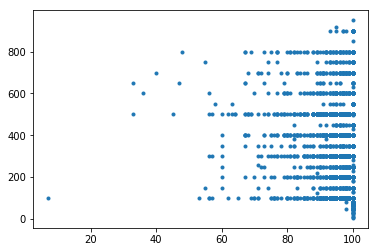

In [1965]:
plt.scatter(df['Rating'],df['Fees'],marker='.')

In [1966]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,city
0,4,24.0,100.0,5,100,4
1,2,12.0,98.0,0,350,0
2,5,9.0,100.0,3,300,0
3,5,12.0,100.0,0,250,0
4,2,20.0,100.0,0,250,1


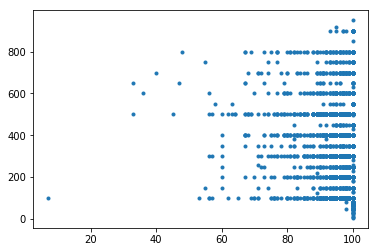

In [1967]:
plt.scatter(x=df['Rating'],y=df['Fees'],marker='.')

In [1968]:
#a=df[df['Rating']<40]
#df=df[df['Rating']>40]

In [1969]:
df.var()

Qualification        2.150317
Experience         124.161946
Rating              34.592498
Profile              2.749012
Fees             36450.588881
city                 5.415560
dtype: float64

In [1970]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,city
0,4,24.0,100.0,5,100,4
1,2,12.0,98.0,0,350,0
2,5,9.0,100.0,3,300,0
3,5,12.0,100.0,0,250,0
4,2,20.0,100.0,0,250,1


In [1971]:
df.shape

(5961, 6)

In [1972]:
x=df.drop(['Fees'],axis=1)
y=df['Fees']

In [1973]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [1974]:
reg=Lasso(alpha=0.1)
reg.fit(x_train,y_train)
y_reg=reg.predict(x_test)
np.sqrt(mean_squared_error(y_reg,y_test))

181.02574383093358

In [1975]:
bag=GradientBoostingRegressor(n_estimators=150)
bag.fit(x_train,y_train)
y_bag=bag.predict(x_test)
np.sqrt(mean_squared_error(y_bag,y_test))

168.15064877300821

In [1976]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_reg=reg.predict(x_test)
np.sqrt(mean_squared_error(y_reg,y_test))

181.02855541289534

In [1977]:
test=pd.read_excel('F:\\Final_Test.xlsx')
test.drop(['Miscellaneous_Info'],axis=1,inplace=True)
test.shape

(1987, 5)

In [1978]:
test['Rating']=test['Rating'].str.replace('%'," ")
test['Rating']=test['Rating'].astype('float')
test['Experience']=test['Experience'].str.replace(' years experience',' ')
test['Experience']=test['Experience'].astype('float')

In [1979]:
place=test['Place'].mode()
place

0    Andheri West, Mumbai
1     Mulund West, Mumbai
dtype: object

In [1980]:
test['Place'].fillna('Andheri West, Mumbai',inplace=True)
test.isnull().sum()

Qualification       0
Experience          0
Rating           1090
Place               0
Profile             0
dtype: int64

In [1981]:
le=LabelEncoder()
test['Profile']=le.fit_transform(test['Profile'])
df['Profile']=df['Profile'].astype('category')

In [1982]:
rating=test['Rating'].mode()
test['Rating']=test['Rating'].fillna(100)
test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

In [1983]:
a=test['Place'].str.split(',')
test['city']=a.str[1]
test['Adress']=a.str[0]
test.drop(['Place','Adress'],axis=1,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
Qualification    1987 non-null object
Experience       1987 non-null float64
Rating           1987 non-null float64
Profile          1987 non-null int64
city             1987 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 77.7+ KB


In [1984]:
a=test['city'].mode()
test['city']=test['city'].fillna(' Bangalore')
test['city'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                395
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Name: city, dtype: int64

In [1985]:
test['city']=le.fit_transform(test['city'])
#test = pd.get_dummies(test,columns=["city"],prefix=["city"])
test['city']=test['city'].astype('category')
test['city'].value_counts()

0    420
3    417
6    395
5    333
1    287
2     70
4     48
7     17
Name: city, dtype: int64

In [1986]:
a=test['Qualification'].str.split('-')
b=a.str[0].str.split(',').str[0]
test['Qualification']=b
test['Qualification']=test[test['Qualification'].str.isupper()]
test['Qualification'].value_counts()
test['Qualification']=test[test['Qualification'].str.len()<5]
test['Qualification']=test['Qualification'].fillna(method='ffill')

In [1987]:
df['Qualification'].value_counts()

5    2511
3    1240
2     743
4     720
1     546
6     116
0      85
Name: Qualification, dtype: int64

In [1988]:
test['Qualification'].value_counts()

MBBS    893
BDS     381
BAMS    236
BHMS    235
MD       93
MDS      61
MS       38
DDVL     13
DNB      13
LCEH      5
MDS       4
DM        2
DO        2
BSAM      2
MD        1
DEHM      1
DVD       1
FRCP      1
DHMS      1
FICD      1
FPFA      1
DMS       1
FWFO      1
Name: Qualification, dtype: int64

In [1989]:
y_test=bag.predict(test)
y_test=y_test.astype('int')

ValueError: could not convert string to float: 'MBBS'

In [ ]:
final=pd.DataFrame(y_test)
final.columns=['Fees']
final.head()

In [ ]:
final.to_excel('F:\\submit.xlsx',index=False)